
# Project: Investigate a Movie Dataset
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data set analyzed in this notebook is the TMDB Movies Database. This data set originiated from Kaggle and provided by Udacity. There is information on more than 5000 movies. The information used below is popularity, revenue, bugdet, and runtime. The information chosen from the data set is to dive into what metrics are good for figuring out how to measure a movies' success. 

 


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import os
from scipy.stats import pearsonr
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline


/home/aurora/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # surppresses scietific notation

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
data = pd.read_csv('../tmdb-movies.csv')


In [4]:
#This allows us to look inside of the dataset
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
1,76341,tt1392190,28.420,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100,2015,137999939.280,348161292.489
2,262500,tt2908446,13.113,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300,2015,101199955.472,271619025.408
3,140607,tt2488496,11.173,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500,2015,183999919.040,1902723129.802
4,168259,tt2820852,9.335,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300,2015,174799923.088,1385748801.471


In [5]:
data.shape #returns how many rows and column of the dataset

(10866, 21)

In [6]:
data.describe() #returns statistics about the numerical columns

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000
mean,66064.177,0.646,14625701.094,39823319.793,102.071,217.390,5.975,2001.323,17551039.823,51364363.253
std,92130.137,1.000,30913213.831,117003486.582,31.381,575.619,0.935,12.813,34306155.723,144632485.040
min,5.000,0.000,0.000,0.000,0.000,10.000,1.500,1960.000,0.000,0.000
25%,10596.250,0.208,0.000,0.000,90.000,17.000,5.400,1995.000,0.000,0.000
50%,20669.000,0.384,0.000,0.000,99.000,38.000,6.000,2006.000,0.000,0.000
75%,75610.000,0.714,15000000.000,24000000.000,111.000,145.750,6.600,2011.000,20853251.084,33697095.717
max,417859.000,32.986,425000000.000,2781505847.000,900.000,9767.000,9.200,2015.000,425000000.000,2827123750.412


> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [7]:
# Putting all of the columns that will be used in a data frame
movie_data = data[['popularity', 'budget', 'revenue','runtime','genres']]

In [8]:
#checks the new data set
movie_data.shape 

(10866, 5)

In [9]:
#Drops the rows that have atleast 1 NAN
clean_mdata = movie_data.dropna() 

In [10]:
#Now we take a peak at the clean dataset
clean_mdata.describe()

,popularity,budget,revenue,runtime
count,10843.000,10843.000,10843.000,10843.000
mean,0.647,14656724.439,39907792.389,102.138
std,1.001,30938637.671,117113132.251,31.293
min,0.000,0.000,0.000,0.000
25%,0.208,0.000,0.000,90.000
50%,0.385,0.000,0.000,99.000
75%,0.715,15000000.000,24136754.000,111.000
max,32.986,425000000.000,2781505847.000,900.000


In [11]:
# drop if there are duplicates, just in case
clean_mdata = clean_mdata.drop_duplicates()

In [12]:
clean_mdata = clean_mdata[(clean_mdata != 0).all(1)]

In [26]:
#take another peak
sum(clean_mdata.duplicated())

0

In [27]:
clean_mdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 6 columns):
popularity      3854 non-null float64
budget          3854 non-null int64
revenue         3854 non-null int64
runtime         3854 non-null int64
genres          3854 non-null object
gross_profit    3854 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 210.8+ KB


In [14]:
#function that separates the genres for each movie 
def add_genre(column):
    #will take a column, and separate the string from the '|'
    data = clean_mdata[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count


In [15]:
#variable to store the retured value
genre_count = add_genre('genres')


In [16]:
# Formula for gross profit: Revenue - Budget
clean_mdata['gross_profit'] = clean_mdata['revenue'] - clean_mdata['budget']

In [17]:
clean_mdata.head()

,popularity,budget,revenue,runtime,genres,gross_profit
0,32.986,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,1363528810
1,28.420,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,228436354
2,13.113,110000000,295238201,119,Adventure|Science Fiction|Thriller,185238201
3,11.173,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,1868178225
4,9.335,190000000,1506249360,137,Action|Crime|Thriller,1316249360


In [18]:
#Defining these variables here to see a statisitcal correlation in 
#bivariate analysis. Separating my independet and dependent variables
pop = clean_mdata['popularity']
ygp = clean_mdata['gross_profit']

xgen = clean_mdata['genres']
xrev = clean_mdata['revenue']
xbudget = clean_mdata['budget']

## Exploratory Data Analysis



### Research Question 1 (What is the relationship between popularity of a movie and it's budget?)

Below is a scatter plot that decribes the relationship between budget and popularity. Budget is the independent variable and popularity is the dependent variable. The graph to the left shows the relationship in log, while the plot to the right shows the relationship on the varaibles regular scale. The log transformation has spread out the data a bit, in order to see how much budget influences popularity. In most cases, the higher the budget the more popular a movie was. In a few cases, we can see that a low budget had a middle popularity. The same goes for a few high budget movies that had a very low popularity. So, overall, if the movie had a high budget it looks to correlate with moderate to high popularity. Popularity and budget are also run through a Pearson's R correlation and are statistically significant. 

Text(0,0.5,'popularity')

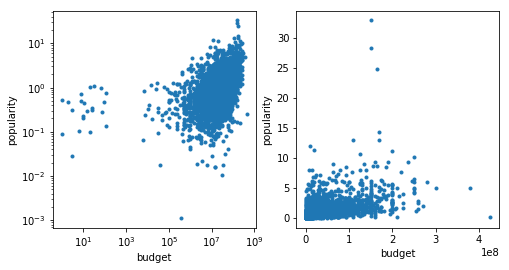

In [19]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.plot(clean_mdata['budget'], clean_mdata['popularity'], '.')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('budget')
ax1.set_ylabel('popularity')
ax2.plot(clean_mdata['budget'], clean_mdata['popularity'], '.')
ax2.set_xlabel('budget')
ax2.set_ylabel('popularity')

In [20]:
#Budget and Population are statistically significant with an alpha of 0.05
pearsonr(xbudget, pop)

(0.4469866930400051, 1.0513638511750907e-188)

### Research Question 2  (Is there an association between a movies' revenue and how popular it is?)

Below is a scatter plot between the variables popularity and revenue. THe plot on the left is in log scale and the plot of the right is the default values. The plot that is in log shows that the higher the revenue the more popular the movie was. There were cases that show movies with high revenue were not very popular, but the majority shows that if a movie had a medium revenue then it was popular. These varaibles are statisitcally significant, which we can tell by running them with a Pearson's R correlation test. 

Text(0,0.5,'popularity')

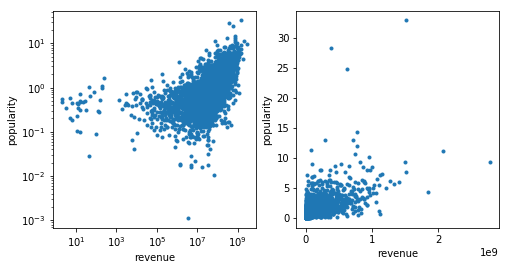

In [21]:
#clean_mdata.plot(x='revenue',y='popularity',kind='scatter')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.plot(clean_mdata['revenue'], clean_mdata['popularity'], '.')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('revenue')
ax1.set_ylabel('popularity')
ax2.plot(clean_mdata['revenue'], clean_mdata['popularity'], '.')
ax2.set_xlabel('revenue')
ax2.set_ylabel('popularity')

In [22]:
pearsonr(xrev, pop)

(0.6155346545546607, 0.0)

### Research Question 3  (Is there a relationship between genre and gross profit?)

Below is a histogram of genre and gross profit. Which genre's did had the highest gross profit? Action, Adventure, Science Fiction,Family, Fantasy, and Animation. The gren's that did the worst are: Foreign, Documentary, Horror, and TV Movie. 

In [23]:
genre_profit = genre_count.copy()
for genre in genre_count.keys():
    has_genre = clean_mdata['genres'].str.contains(genre)
    genre_profit[genre] = clean_mdata['gross_profit'][has_genre].mean()

#ax = genre_profit.plot(kind='bar', title='Avg Gross Profit By Genre')
#ax.set_ylabel('Avg Gross Profit')
#ax.set_xlabel('Genres')

Text(0.5,10.256,'Movie Genres')

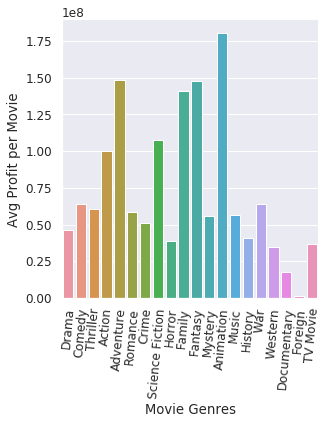

In [24]:
sns.set(font_scale=1.1)
sns.set_style('darkgrid')
gp = genre_profit.to_frame('profit')
gp.reset_index(level=0, inplace=True)
gp.columns = ['genre', 'profit']
plot = sns.catplot(x='genre', y='profit', kind='bar', data=gp)
plot.set_xticklabels(rotation=85)
plot.fig.get_axes()[0].set_ylabel('Avg Profit per Movie')
plot.fig.get_axes()[0].set_xlabel('Movie Genres')

<a id='conclusions'></a>
## Conclusions


Overall, important information can be gathered when looking at the budet and revenue for the popularity of movies. The above plots, on average, show that with a decent budget a movie can be popular. There are a few outliers but for most part, looking at the groupings of each movie's budget showed that a movie needs a moderate budget to do well. 
A movie's revenue is also important to look at. Surprisingly, a small cohert of movies that did not have a high revenue return was still considered to be popular. For the most part though, revenue is a good indicator of how popular a movie is. 